In [2]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [58]:
data = pd.read_csv('data_result.csv',encoding='gb18030')
data.head()

,三天内用户过去购买商品的次数和,三天内用户过去购买金额的总和,三天内用户过去购买金额的均值,三天内用户过去购买金额的最大值,三天内用户过去购买金额的标准差,三天内用户过去交易的当天购买时长均值,三天内用户过去交易的当天购买时长最大值,三天内用户过去交易的当天购买时长标准差,三天内用户过去退款的次数和,三天内用户过去退款金额的和,...,用户是否为主播,用户是否签约频道,用户作为主播的经验值,用户作为观众的经验值,用户过去打赏不同主播的个数和,用户过去是否受到过CODE_REAR_RISK_FAIL拦截,购买类别,当天购买时长,当天退款时长,该订单是否被退款
0,1,88.0,88.0,88.0,0.0,83415.0,83415,0.0,0,0.0,...,0,0,0,235,1,0,2,83572,999999999999,0
1,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,0,0,0,235,1,0,2,83415,999999999999,0
2,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,0,0,0,75,1,0,1,62912,999999999999,0
3,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,1,1,127538,4783,1,0,9,75995,999999999999,0
4,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,0,0,0,1274,2,0,2,156,999999999999,0


# **数据预处理**

In [59]:
#RFM框架
datar = data[['三天内用户过去购买商品的次数和', '三天内用户过去购买金额的总和', '三天内用户过去购买金额的均值',
       '三天内用户过去购买金额的最大值', '三天内用户过去购买金额的标准差', '三天内用户过去交易的当天购买时长均值',
       '三天内用户过去交易的当天购买时长最大值', '三天内用户过去交易的当天购买时长标准差', '七天内用户过去购买商品的次数和',
       '七天内用户过去购买金额的总和', '七天内用户过去购买金额的均值', '七天内用户过去购买金额的最大值',
       '七天内用户过去购买金额的标准差', '七天内用户过去交易的当天购买时长均值', '七天内用户过去交易的当天购买时长最大值',
       '七天内用户过去交易的当天购买时长标准差', '十五天内用户过去购买商品的次数和', '十五天内用户过去购买金额的总和',
       '十五天内用户过去购买金额的均值', '十五天内用户过去购买金额的最大值', '十五天内用户过去购买金额的标准差',
       '十五天内用户过去交易的当天购买时长均值', '十五天内用户过去交易的当天购买时长最大值', '十五天内用户过去交易的当天购买时长标准差',
       '一个月内用户过去购买商品的次数和', '一个月内用户过去购买金额的总和', '一个月内用户过去购买金额的均值',
       '一个月内用户过去购买金额的最大值', '一个月内用户过去购买金额的标准差', '一个月内用户过去交易的当天购买时长均值',
       '一个月内用户过去交易的当天购买时长最大值', '一个月内用户过去交易的当天购买时长标准差', '三个月内用户过去购买商品的次数和',
       '三个月内用户过去购买金额的总和', '三个月内用户过去购买金额的均值', '三个月内用户过去购买金额的最大值',
       '三个月内用户过去购买金额的标准差', '三个月内用户过去交易的当天购买时长均值', '三个月内用户过去交易的当天购买时长最大值',
       '三个月内用户过去交易的当天购买时长标准差', '该订单是否被退款']]

In [60]:
Xr = datar.drop('该订单是否被退款', axis=1)
yr = datar['该订单是否被退款']
Xr.shape , yr.shape

((698290, 40), (698290,))

In [61]:
scaler = StandardScaler()
Xr= scaler.fit_transform(Xr)

In [62]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size = 0.3, 
                                                   random_state = 0,
                                                   stratify = yr)

欠采样

In [63]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
Xr_train, yr_train = rus.fit_resample(Xr_train, yr_train)
#X_train = StandardScaler().fit_transform(X_train)


In [64]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
Xr_test, yr_test = rus.fit_resample(Xr_test, yr_test)
#X_test = StandardScaler().fit_transform(X_test)

# **LSTM**

In [22]:
# design network
np.random.seed(7)
#----------------------------------------------------------------------------
# X_train et X_val sont des dataframe qui contient les features
trainr_LSTM_X=Xr_train
valr_LSTM_X=Xr_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
trainr_LSTM_X = trainr_LSTM_X.reshape((trainr_LSTM_X.shape[0], 1, trainr_LSTM_X.shape[1]))
valr_LSTM_X = valr_LSTM_X.reshape((valr_LSTM_X.shape[0], 1, valr_LSTM_X.shape[1]))

## Recuperation des labels
trainr_LSTM_y=yr_train
valr_LSTM_y=yr_test

In [ ]:
#RFM
inputsr=Input((1, trainr_LSTM_X.shape[2]))
xr1=LSTM(50,return_sequences=True)(inputsr)
# x1=LSTM(50,dropout=0.3,recurrent_dropout=0.2)(inputs)
xr2=LSTM(50)(xr1)
outputsr=Dense(1,activation='sigmoid')(xr2)
modelr=Model(inputsr,outputsr)

In [ ]:
modelr.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
#识别RFM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
historyr=modelr.fit(trainr_LSTM_X, trainr_LSTM_y,epochs=500,batch_size=20000, validation_data=(valr_LSTM_X, valr_LSTM_y),callbacks=[EarlyStopping(monitor='val_loss', patience=4, verbose=0, mode='auto')])

Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 0.7053 - accuracy: 0.2491 - val_loss: 0.6956 - val_accuracy: 0.3915
Epoch 2/500
1/1 [==============================] - 0s 40ms/step - loss: 0.6968 - accuracy: 0.3606 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 35ms/step - loss: 0.6884 - accuracy: 0.4796 - val_loss: 0.6794 - val_accuracy: 0.6756
Epoch 4/500
1/1 [==============================] - 0s 35ms/step - loss: 0.6801 - accuracy: 0.6942 - val_loss: 0.6714 - val_accuracy: 0.7076
Epoch 5/500
1/1 [==============================] - 0s 37ms/step - loss: 0.6720 - accuracy: 0.7292 - val_loss: 0.6636 - val_accuracy: 0.7200
Epoch 6/500
1/1 [==============================] - 0s 35ms/step - loss: 0.6639 - accuracy: 0.7527 - val_loss: 0.6558 - val_accuracy: 0.7345
Epoch 7/500
1/1 [==============================] - 0s 38ms/step - loss: 0.6559 - accuracy: 0.7593 - val_loss: 0.6480 - val_accuracy: 0.7417
Epoch 8/500
1/1 [=====

In [29]:
# save model and architecture to single file
modelr.save('Save_Modelr.h5')
print("Saved modelr to disk")

Saved modelr to disk


In [30]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
modelr = load_model('Save_Modelr.h5')
# summarize model.
modelr.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 40)]           0         
                                                                 
 lstm (LSTM)                 (None, 1, 50)             18200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 38,451
Trainable params: 38,451
Non-trainable params: 0
_________________________________________________________________


In [31]:
# evaluate the model
_, trainr_acc = modelr.evaluate(trainr_LSTM_X, trainr_LSTM_y, verbose=0)
_, testr_acc = modelr.evaluate(valr_LSTM_X, valr_LSTM_y, verbose=0)
print('Trainr: %.3f, Testr: %.3f' % (trainr_acc, testr_acc))

Trainr: 0.879, Testr: 0.878


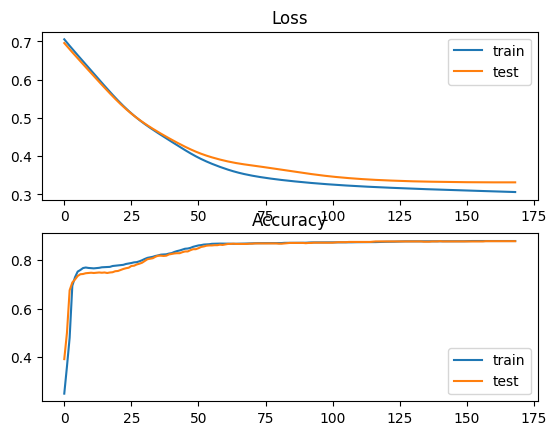

In [32]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(historyr.history['loss'], label='train')
pyplot.plot(historyr.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(historyr.history['accuracy'], label='train')
pyplot.plot(historyr.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [33]:
# predict probabilities for test set
yhatr_probs = modelr.predict(valr_LSTM_X, verbose=0)
# reduce to 1d array
yhatr_probs = yhatr_probs[:, 0]
# val_LSTM_y = list(val_LSTM_y)

In [34]:
print(type(valr_LSTM_y))
print(valr_LSTM_y)
print(type(yhatr_probs))
print(yhatr_probs)
yhatr_probs = [1 if x > 0.5 else 0 for x in yhatr_probs]
print(yhatr_probs)

<class 'pandas.core.series.Series'>
0      0
1      0
2      0
3      0
4      0
      ..
963    1
964    1
965    1
966    1
967    1
Name: 该订单是否被退款, Length: 968, dtype: int64
<class 'numpy.ndarray'>
[0.15564573 0.07295313 0.15564573 0.15564573 0.1846372  0.15564573
 0.31506062 0.15564573 0.1038832  0.14212869 0.1993121  0.15564573
 0.23027733 0.15564573 0.15564573 0.18673037 0.6073402  0.4054326
 0.16956986 0.19131011 0.13011436 0.21870635 0.05181462 0.15564573
 0.22216761 0.10467103 0.13649915 0.15564573 0.15564573 0.09377875
 0.27743816 0.16288616 0.29050383 0.15841003 0.15564573 0.09703329
 0.15564573 0.10265369 0.09107811 0.1614817  0.084988   0.15564573
 0.1160198  0.15564573 0.12287649 0.8186811  0.15564573 0.15822613
 0.6862643  0.15564573 0.12270245 0.12446275 0.15564573 0.15564573
 0.11066654 0.15564573 0.10637514 0.15564573 0.08542501 0.15564573
 0.5323541  0.26312083 0.35751906 0.15564573 0.18173037 0.19031563
 0.05485122 0.13635452 0.27628604 0.1108028  0.15564573 0.15564

In [38]:
#----------------------------------------------------
# accuracy: (tp + tn) / (p + n)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracyr = accuracy_score(valr_LSTM_y, yhatr_probs)
print('Accuracyr: %f' % accuracyr)
# precision tp / (tp + fp)
precisionr = precision_score(valr_LSTM_y, yhatr_probs)
print('Precisionr: %f' % precisionr)
# recall: tp / (tp + fn)
recallr = recall_score(valr_LSTM_y, yhatr_probs)
print('Recallr: %f' % recallr)
f1r = f1_score(valr_LSTM_y, yhatr_probs)
print('f1r: %f' % f1r)

Accuracyr: 0.878099
Precisionr: 0.948529
Recallr: 0.799587
f1r: 0.867713


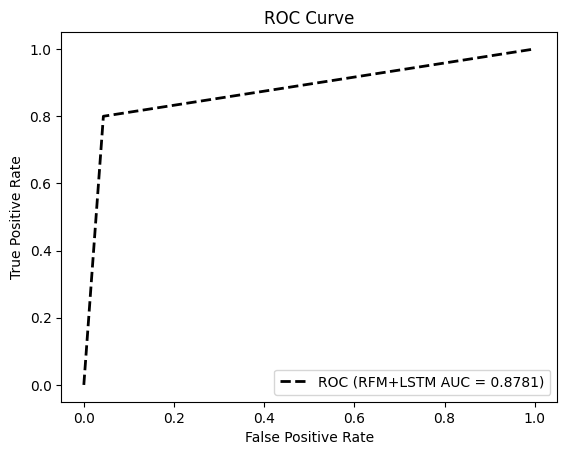

In [51]:

#----------------------------------------------------
#----------------------------------------------------
from sklearn.metrics import auc
import matplotlib.pyplot as plt

fprr, tprr, thersholdsr = roc_curve(valr_LSTM_y, yhatr_probs)
roc_aucr = auc(fprr, tprr)

plt.plot(fprr, tprr, 'k--', label='ROC (RFM+LSTM AUC = {0:.4f})'.format(roc_aucr), lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **CNN**

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.11.0


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print('Done!')

Done!


In [56]:
Xr_train.shape, Xr_test.shape, yr_train.shape, yr_test.shape

((2260, 40), (968, 40), (2260,), (968,))

In [73]:
# We have to reshape into a 3Dimensional object the X_train and X_test
Xrr_train = Xr_train.reshape(Xr_train.shape[0], Xr_train.shape[1], 1)
Xrr_test = Xr_test.reshape(Xr_test.shape[0], Xr_test.shape[1], 1)

Xrr_train.shape, Xrr_test.shape

((2260, 40, 1), (968, 40, 1))

In [58]:
from keras import regularizers

In [85]:
epochs = 100
modelrcnn = Sequential()
modelrcnn.add(Conv1D(32, 2, activation='relu', input_shape = Xrr_train[0].shape
                 ,kernel_regularizer = keras.regularizers.l2(0.0001)))
modelrcnn.add(BatchNormalization())
modelrcnn.add(Dropout(0.3))

modelrcnn.add(Conv1D(64, 2, activation='relu',kernel_regularizer = keras.regularizers.l2(0.0001)))
modelrcnn.add(BatchNormalization())
modelrcnn.add(Dropout(0.3))

modelrcnn.add(Flatten())
modelrcnn.add(Dense(64, activation='relu',kernel_regularizer = keras.regularizers.l2(0.0001)))
modelrcnn.add(Dropout(0.5))

modelrcnn.add(Dense(1, activation='sigmoid'))

In [86]:
modelrcnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 39, 32)            96        
                                                                 
 batch_normalization_2 (Batc  (None, 39, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 39, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 38, 64)            4160      
                                                                 
 batch_normalization_3 (Batc  (None, 38, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 38, 64)           

In [87]:
modelrcnn.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [88]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
historyrcnn = modelrcnn.fit(Xrr_train, yr_train, epochs = epochs, 
                    validation_data=(Xrr_test, yr_test), verbose=1,callbacks=[callback])

Epoch 1/100
71/71 [==============================] - 2s 10ms/step - loss: 0.6217 - accuracy: 0.7500 - val_loss: 0.5220 - val_accuracy: 0.8574
Epoch 2/100
71/71 [==============================] - 0s 7ms/step - loss: 0.4833 - accuracy: 0.8150 - val_loss: 0.4818 - val_accuracy: 0.8626
Epoch 3/100
71/71 [==============================] - 1s 7ms/step - loss: 0.4635 - accuracy: 0.8265 - val_loss: 0.4384 - val_accuracy: 0.8616
Epoch 4/100
71/71 [==============================] - 0s 7ms/step - loss: 0.4382 - accuracy: 0.8332 - val_loss: 0.4253 - val_accuracy: 0.8657
Epoch 5/100
71/71 [==============================] - 0s 7ms/step - loss: 0.4090 - accuracy: 0.8504 - val_loss: 0.4071 - val_accuracy: 0.8605
Epoch 6/100
71/71 [==============================] - 0s 7ms/step - loss: 0.4117 - accuracy: 0.8553 - val_loss: 0.4033 - val_accuracy: 0.8585
Epoch 7/100
71/71 [==============================] - 0s 7ms/step - loss: 0.4148 - accuracy: 0.8496 - val_loss: 0.3877 - val_accuracy: 0.8626
Epoch 8/100


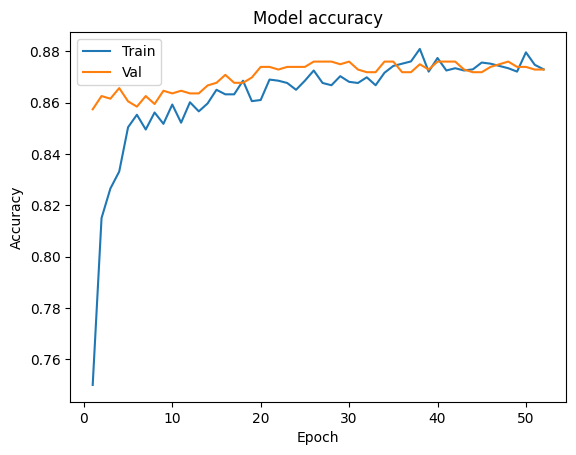

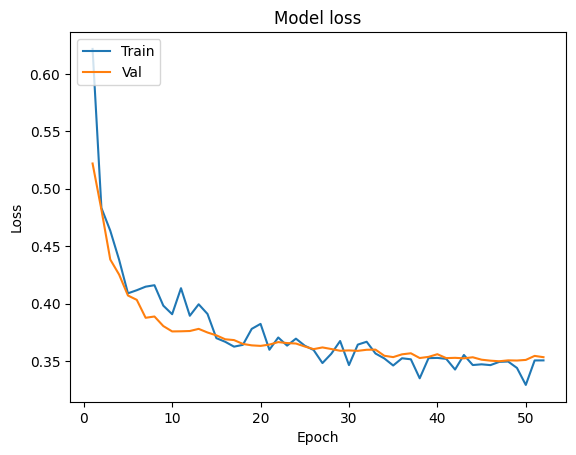

In [89]:
# Plot training and validation accuracy values
epoch_range = range(1, 53)
plt.plot(epoch_range, historyrcnn.history['accuracy'])
plt.plot(epoch_range, historyrcnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training and validation loss values
epoch_range = range(1, 53)
plt.plot(epoch_range, historyrcnn.history['loss'])
plt.plot(epoch_range, historyrcnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [90]:
# predict probabilities for test set
yhatrcnn_probs = modelrcnn.predict(Xrr_test, verbose=0)
# reduce to 1d array
yhatrcnn_probs = yhatrcnn_probs[:, 0]
# val_LSTM_y = list(val_LSTM_y)

In [91]:
print(type(yr_test))
print(yr_test)
print(type(yhatrcnn_probs))
print(yhatrcnn_probs)
yhatrcnn_probs = [1 if x > 0.5 else 0 for x in yhatrcnn_probs]
print(yhatrcnn_probs)

<class 'pandas.core.series.Series'>
0      0
1      0
2      0
3      0
4      0
      ..
963    1
964    1
965    1
966    1
967    1
Name: 该订单是否被退款, Length: 968, dtype: int64
<class 'numpy.ndarray'>
[1.71102732e-01 2.60354020e-02 1.71102732e-01 1.71102732e-01
 1.26018018e-01 1.71102732e-01 2.43803799e-01 1.71102732e-01
 1.52160808e-01 2.69297451e-01 3.11225891e-01 1.71102732e-01
 1.42527759e-01 1.71102732e-01 1.71102732e-01 2.14442030e-01
 4.20056760e-01 4.37511861e-01 2.66997993e-01 2.52268225e-01
 2.69112557e-01 2.64699429e-01 7.68064111e-02 1.71102732e-01
 2.71259695e-01 1.02514118e-01 1.44844949e-01 1.71102732e-01
 1.71102732e-01 3.09127197e-02 3.96451145e-01 2.67758310e-01
 3.02348733e-01 3.04460794e-01 1.71102732e-01 1.07182838e-01
 1.71102732e-01 6.13461100e-02 1.50832430e-01 2.46422142e-01
 3.55342254e-02 1.71102732e-01 1.72440335e-01 1.71102732e-01
 1.53072774e-01 6.80752277e-01 1.71102732e-01 1.83748916e-01
 5.64611375e-01 1.71102732e-01 2.68279433e-01 1.05848536e-01
 1.711

In [92]:
#----------------------------------------------------
# accuracy: (tp + tn) / (p + n)
accuracyrcnn = accuracy_score(yr_test, yhatrcnn_probs)
print('Accuracyrcnn: %f' % accuracyrcnn)
# precision tp / (tp + fp)
precisionrcnn = precision_score(yr_test, yhatrcnn_probs)
print('Precisionrcnn: %f' % precisionrcnn)
# recall: tp / (tp + fn)
recallrcnn = recall_score(yr_test, yhatrcnn_probs)
print('Recallrcnn: %f' % recallrcnn)
f1rcnn = f1_score(yr_test, yhatrcnn_probs)
print('f1rcnn: %f' % f1rcnn)

Accuracyrcnn: 0.872934
Precisionrcnn: 0.941320
Recallrcnn: 0.795455
f1rcnn: 0.862262


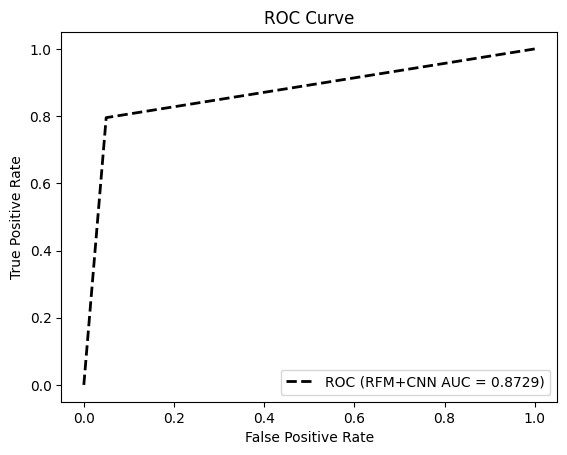

In [93]:

#----------------------------------------------------
#----------------------------------------------------
fprrcnn, tprrcnn, thersholdsrcnn = roc_curve(yr_test, yhatrcnn_probs)
roc_aucrcnn = auc(fprrcnn, tprrcnn)

plt.plot(fprrcnn, tprrcnn, 'k--', label='ROC (RFM+CNN AUC = {0:.4f})'.format(roc_aucrcnn), lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **MachineLearning**

In [101]:
pip install xgboost

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/python-3.7.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install statsmodels

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 9.9 MB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 40.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ma-user/anaconda3/envs/python-3.7.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install lightgbm

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 2.0 MB 39.5 MB/s eta 0:00:01████▊               | 1.0 MB 39.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ma-user/anaconda3/envs/python-3.7.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [103]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
import keras
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD
from tensorflow.estimator import inputs

#Hiding the warnings
warnings.filterwarnings('ignore') 

2.11.0


In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print('Done!')

Done!


In [105]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
Xr_test, yr_test = rus.fit_resample(Xr_test, yr_test)
#X_test = StandardScaler().fit_transform(X_test)

In [106]:
xr_test = Xr_test
xr_train = Xr_train
yr_test = yr_test
yr_train = yr_train


In [117]:
from sklearn.metrics import precision_score
def modelresult(model_rml,xr_train, xr_test,yr_train,yr_test):
    model_rml=model_rml.fit(xr_train,yr_train) # Fitting train data for fraud detection

    yr_pred=model_rml.predict(xr_test)

    accuracy_r=accuracy_score(yr_test,yr_pred)

    precision_r = precision_score(yr_test,yr_pred)

    recall_r=recall_score(yr_test,yr_pred)

    conf_r=confusion_matrix(yr_test,yr_pred)

    f1_r=f1_score(yr_test,yr_pred)

    print('RFM Model paramters used are :',model_rml)
    print('Accuracy of RFM status is:', (accuracy_r)*100,'%')
    print('Precision of RFM status is        :', (precision_r)*100,'%')
    print('Recall score of RFM is:', (recall_r)*100,'%')
    print('Conf Matrix of RFM is: \n',(conf_r))
    print('F1 score of RFM is:', (f1_r)*100,'%')

LogisticRegressionl逻辑回归模型

In [118]:
model_r = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
#Giving inputs to the defined function
modelresult(model_r,xr_train, xr_test,yr_train,yr_test)

RFM Model paramters used are : LogisticRegression(random_state=0)
Accuracy of RFM status is: 86.57024793388429 %
Precision of RFM status is        : 92.7536231884058 %
Recall score of RFM is: 79.33884297520662 %
Conf Matrix of RFM is: 
 [[454  30]
 [100 384]]
F1 score of RFM is: 85.52338530066814 %


GaussianNB模型

In [119]:
model_r = GaussianNB()
modelresult(model_r,xr_train, xr_test,yr_train,yr_test)

RFM Model paramters used are : GaussianNB()
Accuracy of RFM status is: 76.65289256198346 %
Precision of RFM status is        : 91.61290322580645 %
Recall score of RFM is: 58.67768595041323 %
Conf Matrix of RFM is: 
 [[458  26]
 [200 284]]
F1 score of RFM is: 71.53652392947104 %


svm模型

In [120]:
model_r = svm.LinearSVC()
modelresult(model_r,xr_train, xr_test,yr_train,yr_test)

RFM Model paramters used are : LinearSVC()
Accuracy of RFM status is: 81.09504132231406 %
Precision of RFM status is        : 91.46005509641874 %
Recall score of RFM is: 68.59504132231406 %
Conf Matrix of RFM is: 
 [[453  31]
 [152 332]]
F1 score of RFM is: 78.39433293978747 %


KNN模型

In [121]:
model_r = KNeighborsClassifier(n_neighbors=1)
modelresult(model_r,xr_train, xr_test,yr_train,yr_test)

RFM Model paramters used are : KNeighborsClassifier(n_neighbors=1)
Accuracy of RFM status is: 85.3305785123967 %
Precision of RFM status is        : 88.0 %
Recall score of RFM is: 81.81818181818183 %
Conf Matrix of RFM is: 
 [[430  54]
 [ 88 396]]
F1 score of RFM is: 84.796573875803 %


LDA模型

In [122]:
model_r = LinearDiscriminantAnalysis()
modelresult(model_r,xr_train, xr_test,yr_train,yr_test)

RFM Model paramters used are : LinearDiscriminantAnalysis()
Accuracy of RFM status is: 84.400826446281 %
Precision of RFM status is        : 92.36641221374046 %
Recall score of RFM is: 75.0 %
Conf Matrix of RFM is: 
 [[454  30]
 [121 363]]
F1 score of RFM is: 82.78221208665906 %


随机森林模型

In [123]:
model_r = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
modelresult(model_r,xr_train, xr_test,yr_train,yr_test)

RFM Model paramters used are : RandomForestClassifier(max_depth=10, random_state=0)
Accuracy of RFM status is: 88.7396694214876 %
Precision of RFM status is        : 96.75810473815461 %
Recall score of RFM is: 80.16528925619835 %
Conf Matrix of RFM is: 
 [[471  13]
 [ 96 388]]
F1 score of RFM is: 87.68361581920904 %


In [10]:
import torch
import torch.nn as nn
import numpy as np
import math

In [11]:
class Mylstm(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = 128  # 循环神经元个数128
        self.rnn = nn.LSTM(input_size=1, hidden_size=self.hidden // 2, batch_first=True, num_layers=1,
                           bidirectional=True)
        # self.project_1 = nn.Linear(1, self.hidden)
        self.activation = nn.Sigmoid()
        self.project_2 = nn.Linear(self.hidden, 2)

    def forward(self, X):
        output = X.unsqueeze(2)
        # output=self.project_1(output)
        output, _ = self.rnn(output)
        fin_layer = output[:, -1]
        output = self.project_2(fin_layer)
        # output= self.activation(output)
        return output

    def test(self, X):
        result = self.activation(self.forward(X))
        result = torch.argmax(result, dim=1)
        return result


In [12]:
class Mylstm_attn(nn.Module):
    def __init__(self, batch):
        super().__init__()
        self.hidden = 128
        self.batch = batch
        self.attn_weight = nn.Parameter(torch.randn(self.batch, 1, self.hidden))
        self.rnn = nn.LSTM(input_size=1, hidden_size=self.hidden // 2, batch_first=True, num_layers=1,
                           bidirectional=True)
        self.project = nn.Linear(self.hidden, 2)
        self.activation = nn.Sigmoid()
        self.attn_drop = nn.Dropout(p=0.3)
        self.lstm_drop = nn.Dropout(p=0.3)

    def attention(self, H):
        M = torch.tanh(H)
        a = torch.softmax(torch.bmm(self.attn_weight[:M.shape[0]], M), 2)
        a = torch.transpose(a, 1, 2)
        return torch.bmm(H, a)

    def forward(self, X):
        output = X.unsqueeze(2)
        output, _ = self.rnn(output)
        output = self.lstm_drop(output)
        output = output.transpose(1, 2)
        output = self.attention(output)
        output = output.transpose(1, 2)
        output = self.attn_drop(output)
        output = self.project(output)
        return output.squeeze()

    def test(self, X):
        output = X.unsqueeze(2)
        output, _ = self.rnn(output)
        output = output.transpose(1, 2)
        output = self.attention(output)
        output = output.transpose(1, 2)
        output = self.project(output)
        output = output.squeeze()
        output = self.activation(output)
        output = torch.argmax(output, dim=1)
        return output


In [13]:
class Myself_attn(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = 100
        self.project_K = nn.Linear(1, self.hidden, bias=False)
        self.project_Q = nn.Linear(1, self.hidden, bias=False)
        self.project_V = nn.Linear(1, self.hidden, bias=False)
        self.softmax = nn.Softmax(dim=2)
        self.layer_norm = nn.LayerNorm(normalized_shape=self.hidden)
        self.layer_1 = nn.Linear(self.hidden, self.hidden)
        self.layer_2 = nn.Linear(self.hidden, self.hidden)
        self.relu = nn.ReLU()
        self.A=nn.Linear(40,1)

    def singal_head_score(self, Q, K):
        dot_product = torch.bmm(Q, K.transpose(1, 2)) / math.sqrt(self.hidden)
        return self.softmax(dot_product)  # batch seq_len seq_len
    def mul_attention_score(self, Q, K, head):
        mul_Q = Q.reshape(Q.shape[0], Q.shape[1], head, -1).transpose(1, 2)
        mul_K = K.reshape(K.shape[0], K.shape[1], head, -1).transpose(1, 2)
        Q_shape=mul_Q.shape
        K_shape=mul_K.shape
        mul_Q = mul_Q.reshape(Q_shape[0] * Q_shape[1], Q_shape[2], Q_shape[3])
        mul_K = mul_K.reshape(K_shape[0] * K_shape[1], K_shape[2], K_shape[3])
        dot_product = torch.bmm(mul_Q, mul_K.transpose(1, 2)) / math.sqrt(self.hidden / head)
        result = self.softmax(dot_product)
        return result # batch*head, seq_len, seq_len
    def ffn_add_norm(self,X):
        result = self.relu(self.layer_2(self.layer_1(X)))
        result = X + result
        result = self.layer_norm(result)
        return result
    def forward(self,X):
        # X.shape = batch,seq
        X=X.unsqueeze(2) # -> batch seq , 1
        Q=self.project_Q(X)
        K=self.project_K(X)
        V=self.project_V(X)
        head=4
        if head==1:
            attention_score = self.singal_head_score(Q,K)
            result=torch.bmm(attention_score,V)
        else:
            attention_score = self.mul_attention_score(Q, V, head)
            V = V.reshape(V.shape[0], V.shape[1], head, -1).transpose(1, 2)
            V = V.reshape(V.shape[0] * head, V.shape[2], V.shape[3])
            result = torch.bmm(attention_score, V)
            result = result.transpose(1, 2)
            result = result.reshape(int(result.shape[0] / head), head, result.shape[1], result.shape[2])
            result = result.reshape(result.shape[0], head * result.shape[2], result.shape[3]).transpose(1, 2)
            V=V.transpose(1,2)
            V=V.reshape(int(V.shape[0]/head),head,V.shape[1],V.shape[2])
            V=V.reshape(V.shape[0],head*V.shape[2],V.shape[3]).transpose(1,2)
        result=result+V
        result=self.ffn_add_norm(result)
        result=result.transpose(1,2)
        result=self.A(result)
        # result
        return result

In [14]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


In [57]:
Xr_train.shape, Xr_test.shape, yr_train.shape, yr_test.shape

(torch.Size([2260, 40]), torch.Size([968, 40]), (2260,), (968,))

In [16]:
model_type='self_attn'
if model_type=='self_attn':
    model = Myself_attn()
    Xr_train = torch.tensor((Xr_train), dtype=torch.float)
    Xr_test = torch.tensor((Xr_test), dtype=torch.float)
    yr_probs =[]
    epoch = 30
    batch = 128
    lr = 0.001
    opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    cross_loss = nn.CrossEntropyLoss()
    for e in range(epoch+1):
        epoch_loss = 0
        precision = 0
        model.train()
        for i in range(0, Xr_train.shape[0], batch):
            X = Xr_train[i:i + batch]
            label = torch.tensor((yr_train[i:i + batch].to_numpy()), dtype=torch.int64)
            output = model(X)
            loss = cross_loss(output, label.reshape(-1,1))
            loss.backward()
            epoch_loss += loss.item()
            opt.step()
            opt.zero_grad()
        model.eval()
        for i in range(0, Xr_test.shape[0], batch):
            X = Xr_test[i:i + batch]
            label = torch.tensor((yr_test[i:i + batch].to_numpy()), dtype=torch.int64)
            output = model(X)
            pre=torch.argmax(output,dim=1)
            precision += torch.eq(pre,label.reshape(-1,1)).sum().item()
            
        print('epoch : ', e, '---epoch_loss--- : ', epoch_loss, '---test_precision--- : ', precision / Xr_test.shape[0])
    

    

epoch :  0 ---epoch_loss--- :  78.40277671813965 ---test_precision--- :  0.753099173553719
epoch :  1 ---epoch_loss--- :  28.66584587097168 ---test_precision--- :  0.7613636363636364
epoch :  2 ---epoch_loss--- :  30.698408365249634 ---test_precision--- :  0.7613636363636364
epoch :  3 ---epoch_loss--- :  27.372573018074036 ---test_precision--- :  0.7675619834710744
epoch :  4 ---epoch_loss--- :  25.458897829055786 ---test_precision--- :  0.7758264462809917
epoch :  5 ---epoch_loss--- :  24.628331303596497 ---test_precision--- :  0.7820247933884298
epoch :  6 ---epoch_loss--- :  23.95616900920868 ---test_precision--- :  0.7892561983471075
epoch :  7 ---epoch_loss--- :  23.265235543251038 ---test_precision--- :  0.7902892561983471
epoch :  8 ---epoch_loss--- :  22.58143812417984 ---test_precision--- :  0.7933884297520661
epoch :  9 ---epoch_loss--- :  22.366550981998444 ---test_precision--- :  0.7964876033057852
epoch :  10 ---epoch_loss--- :  21.66519784927368 ---test_precision--- :  0

In [34]:
print(model)

Myself_attn(
  (project_K): Linear(in_features=1, out_features=100, bias=False)
  (project_Q): Linear(in_features=1, out_features=100, bias=False)
  (project_V): Linear(in_features=1, out_features=100, bias=False)
  (softmax): Softmax(dim=2)
  (layer_norm): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
  (layer_1): Linear(in_features=100, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=100, bias=True)
  (relu): ReLU()
  (A): Linear(in_features=40, out_features=1, bias=True)
)


In [37]:
label = torch.tensor((yr_test.to_numpy()), dtype=torch.int64)
output = model(Xr_test)
pre=torch.argmax(output,dim=1)
ypred = pre.squeeze()

In [47]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score
accuracy=accuracy_score(label,ypred)

precision = precision_score(label,ypred)

recall=recall_score(label,ypred)

conf=confusion_matrix(label,ypred)

f1=f1_score(label,ypred)
print("self_attn ： ")
print("accuracy :",accuracy)
print("precision :",precision)
print("recall :",recall)
print("conf :",conf)
print("f1:",f1)

self_attn ： 
accuracy : 0.8305785123966942
precision : 0.8619909502262444
recall : 0.7871900826446281
conf : [[423  61]
 [103 381]]
f1: 0.8228941684665227


In [74]:
model_type='attn_lstm'
if model_type=='attn_lstm':
    Xr_train = torch.tensor((Xr_train), dtype=torch.float)
    Xr_test = torch.tensor((Xr_test), dtype=torch.float)
    epoch = 50
    batch = 512
    lr = 0.001
    model = Mylstm_attn(batch)
    opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    cross_loss = nn.CrossEntropyLoss()
    for e in range(epoch):
        epoch_loss = 0
        precision = 0
        model.train()
        for i in range(0, Xr_train.shape[0], batch):
            X = Xr_train[i:i + batch]
            label = torch.tensor((yr_train[i:i + batch].to_numpy()), dtype=torch.int64)
            output = model(X)
            loss = cross_loss(output, label)
            loss.backward()
            epoch_loss += loss.item()
            opt.step()
            opt.zero_grad()
        model.eval()
        for i in range(0, Xr_test.shape[0], batch):
            X = Xr_test[i:i + batch]
            label = torch.tensor((yr_test[i:i + batch].to_numpy()), dtype=torch.int64)
            output = model.test(X)
            precision += (output == label).sum().item()
        print('epoch : ', e, '---epoch_loss--- : ', epoch_loss, '---test_precision--- : ', precision / Xr_test.shape[0])

        

<ipython-input-74-75d7e105f447>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xr_train = torch.tensor((Xr_train), dtype=torch.float)
<ipython-input-74-75d7e105f447>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xr_test = torch.tensor((Xr_test), dtype=torch.float)


epoch :  0 ---epoch_loss--- :  3.5363959670066833 ---test_precision--- :  0.6663223140495868
epoch :  1 ---epoch_loss--- :  3.322204053401947 ---test_precision--- :  0.7747933884297521
epoch :  2 ---epoch_loss--- :  3.1690115332603455 ---test_precision--- :  0.8047520661157025
epoch :  3 ---epoch_loss--- :  3.0164905190467834 ---test_precision--- :  0.7975206611570248
epoch :  4 ---epoch_loss--- :  2.8800318837165833 ---test_precision--- :  0.7902892561983471
epoch :  5 ---epoch_loss--- :  2.736098736524582 ---test_precision--- :  0.7882231404958677
epoch :  6 ---epoch_loss--- :  2.5990875363349915 ---test_precision--- :  0.7840909090909091
epoch :  7 ---epoch_loss--- :  2.467376083135605 ---test_precision--- :  0.7840909090909091
epoch :  8 ---epoch_loss--- :  2.3677278459072113 ---test_precision--- :  0.7861570247933884
epoch :  9 ---epoch_loss--- :  2.344940721988678 ---test_precision--- :  0.7923553719008265
epoch :  10 ---epoch_loss--- :  2.3374807238578796 ---test_precision--- : 

In [36]:
print(model)

Mylstm_attn(
  (rnn): LSTM(1, 64, batch_first=True, bidirectional=True)
  (project): Linear(in_features=128, out_features=2, bias=True)
  (activation): Sigmoid()
  (attn_drop): Dropout(p=0.3, inplace=False)
  (lstm_drop): Dropout(p=0.3, inplace=False)
)


In [78]:
model = Mylstm_attn(len(Xr_test))
ypred = model.test(Xr_test)

In [83]:
label = torch.tensor((yr_test.to_numpy()), dtype=torch.int64)

In [84]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score
accuracy=accuracy_score(label,ypred)

precision = precision_score(label,ypred)

recall=recall_score(label,ypred)

conf=confusion_matrix(label,ypred)

f1=f1_score(label,ypred)
print("self_attn ： ")
print("accuracy :",accuracy)
print("precision :",precision)
print("recall :",recall)
print("conf :",conf)
print("f1:",f1)

self_attn ： 
accuracy : 0.4628099173553719
precision : 0.48068669527896996
recall : 0.9256198347107438
conf : [[  0 484]
 [ 36 448]]
f1: 0.632768361581921
